In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import Image 
from glob import glob
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# read an image
img = cv2.imread('./data/lady.jpg')
# convert into grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# apply haar cascade
haar = cv2.CascadeClassifier('./model/haarcascade_frontalface_default.xml')
faces = haar.detectMultiScale(gray,1.3,5)

In [4]:
print(faces)

[[167 132 275 275]]


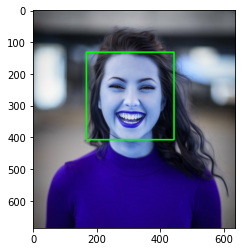

In [5]:
cv2.rectangle(img,(167,132),(167+275,132+275),(0,255,0),3)
plt.imshow(img)

In [6]:
cv2.imshow('object_detect',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

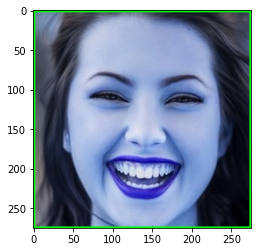

In [7]:
# crop
face_crop = img[132:132+275,167:167+275]
plt.imshow(face_crop)

In [8]:
cv2.imwrite('female_01.jpg',face_crop)

True

## Video

In [9]:
def face_detect(img):
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = haar.detectMultiScale(gray,1.3,5)
    
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),2)
    
    return img

In [10]:
cap = cv2.VideoCapture('./data/videoplay.mp4')

while True:
    ret,frame = cap.read()
    if ret == False:
        break
    frame = face_detect(frame)  
    cv2.imshow('object_detect',frame)
    cv2.imshow('gray',gray)
    if cv2.waitKey(20) == 27:    #27=>esc key
        break

cv2.destroyAllWindows()
cap.release()